# Calibración del histograma (o expansión del contraste)

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

(-0.5, 255.5, 255.5, -0.5)

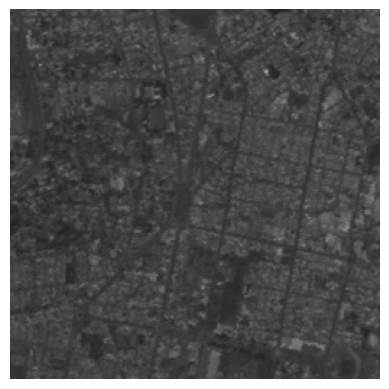

In [7]:
quitoImg = cv2.imread("img_lab2/QUITO.png", 0)
plt.imshow(quitoImg, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

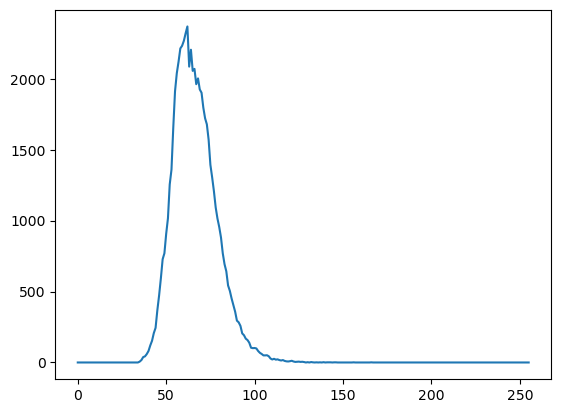

In [ ]:
hist = cv2.calcHist([quitoImg], [0], None, [256], [0, 256])
plt.plot(hist)

Los valores se encuentran aproximadamente entre 40 y 120 con su pico alrededor de 60, lo cual denota un gris oscuro. La imagen no tiene mucho contraste debido a que los valores se encuentran muy cerca entre si.

(-0.5, 255.5, 255.5, -0.5)

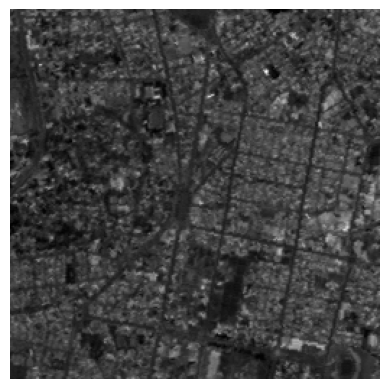

In [ ]:
rescaled_img = exposure.rescale_intensity(quitoImg, in_range=(np.min(quitoImg),np.max(quitoImg)), out_range=(0,255)).astype(np.uint8)
plt.imshow(rescaled_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

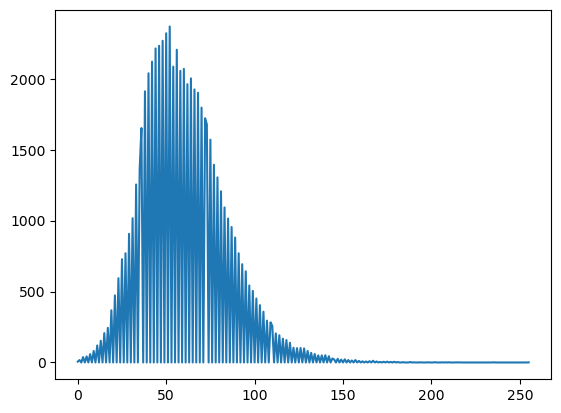

In [ ]:
hist = cv2.calcHist([rescaled_img], [0], None, [256], [0, 256])
plt.plot(hist)

Se puede ver que la imagen presenta un contraste más marcado y de esta forma es posible distinguir mucho mejor los objetos que aparecen en la imágen.

**Calibración 1: 50-100**

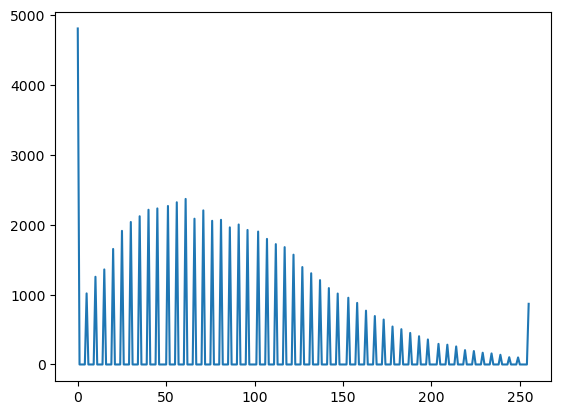

In [36]:
rescaled1 = exposure.rescale_intensity(quitoImg, in_range=(50, 100), out_range=(0, 255)).astype(uint8)
hist_rescaled1 = cv2.calcHist([rescaled1], [0], None, [256], [0, 256])
plt.plot(hist_rescaled1)

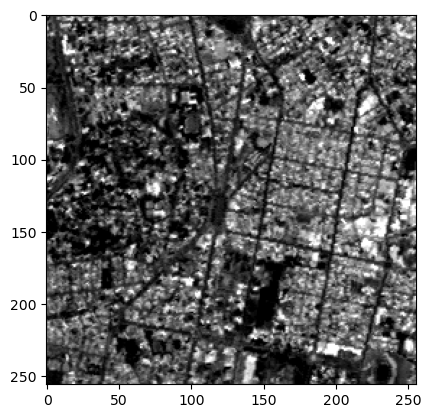

In [22]:
plt.imshow(rescaled1, cmap='gray', vmin=0, vmax=255)

Al hacer esta primera calibración lo que conseguimos es un contraste mucho más alto, pero hemos tomado una porción reducida del histograma, perdiendo de esta forma muchos tonos de gris que se encontraban en la imagen prinicipal y haciendo esto que sea más dificil distinguir los objetos de la imágen.

**Calibración 2: 40-120**

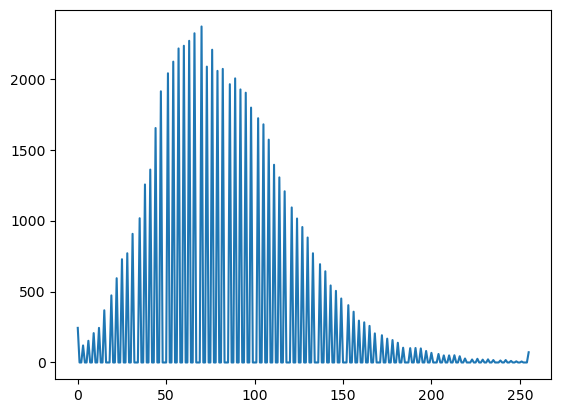

In [37]:
rescaled2 = exposure.rescale_intensity(quitoImg, in_range=(40, 120), out_range=(0, 255)).astype(uint8)
hist_rescaled2 = cv2.calcHist([rescaled2], [0], None, [256], [0, 256])
plt.plot(hist_rescaled2)

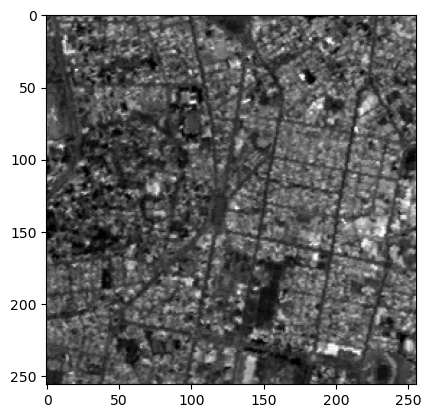

In [26]:
plt.imshow(rescaled2, cmap='gray', vmin=0, vmax=255)

A pesar de que el contraste es menor la calidad de la imagen aumenta porque tenemos muchos más tonos de gris en la imagen.

**Calibración 3: 35-166**

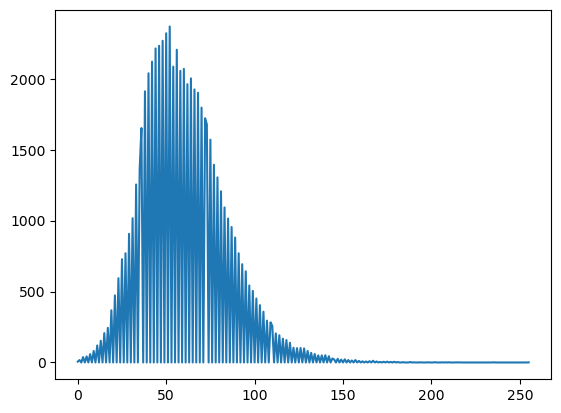

In [38]:
rescaled3 = exposure.rescale_intensity(quitoImg, in_range=(35, 166), out_range=(0, 255)).astype(uint8)
hist_rescaled3 = cv2.calcHist([rescaled3], [0], None, [256], [0, 256])
plt.plot(hist_rescaled3)

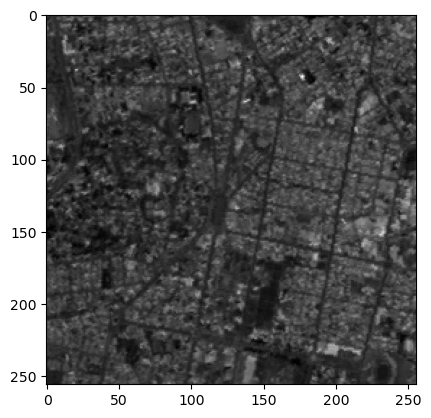

In [28]:
plt.imshow(rescaled3, cmap='gray', vmin=0, vmax=255)

Luego de hacer las 3 calibraciones lo que podemos observar es que la diferencia se encuentra en el contraste entre estas, es decir, las imagenes que tomaban un segmento menor de colores y lo amplificaban eran imágenes que mostraban un aumento significativo del contraste. Sin embargo al perder muchos tonos podían los objetos en la imagen verse mucho menos definidos.

La calibración 35-166 da el mismo resultado que la expansión de contraste debido a que la cantidad de colores usados es la misma. Es decir cuando calculamos el minimo y máximo de la imagen original estos valores eran 35 y 166, entonces al ahcer la calibración obtenemos los mismos resultados que haciendola usando el máximo y mínimo de la imágen original.

In [35]:
print(f"Minimo {np.min(quitoImg)} \nMáximo {np.max(quitoImg)}")

Minimo 35 
Máximo 166
